## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\sanka'

### Loading the data into the data frame

In [2]:
df_leads = pd.read_csv(r'C:\Users\sanka\Downloads\Lead Scoring Assignment\Lead Scoring Data & Data Dictionary\Leads.csv')
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
df_leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Understanding the Data

In [4]:
#Finding the total number of rows and columns
df_leads.shape

(9240, 37)

### Checking the distribution of Target variable 'Converted' for any data imbalance

In [5]:
#First finding out what is the conversion late in the current state. This is the metric which we are tying to optimize for.
conversion_rate = (df_leads['Converted'].sum() / len(df_leads)) * 100
print("Current Conversion Rate: {:.2f}%".format(conversion_rate))

Current Conversion Rate: 38.54%


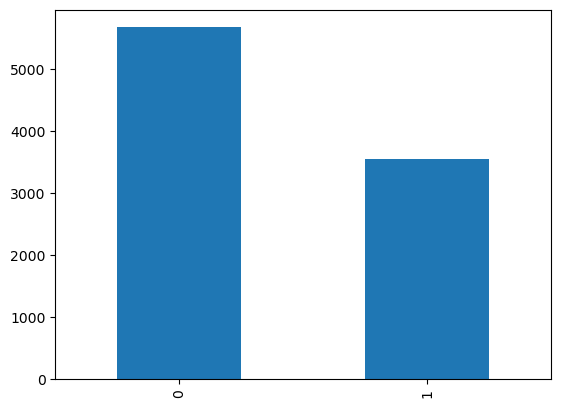

In [6]:
#The column 'Converted' is our target column or the dependent variable of the logistic regression
#Finding out if the data is not skewed towards a particular outcome
df_leads['Converted'].value_counts().plot(kind = 'bar')
plt.show()

In [7]:
#Finding out the percentage distribution of Converted Leads vs Con converted Leads
df_leads['Converted'].value_counts()*100/df_leads.shape[0]
#The distribution looks fine.

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [8]:
#Finding out the columns and their data types
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can observe that there are multiple columns such as 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' , 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' with high % of values which are null. We will be removing those records.

In [9]:
#Learning more about the numerical variables in the dataset 
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
#Finding the % of null values in each of the columns
null_percentage = (df_leads.isnull().sum() / len(df_leads)) * 100
# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column Name': df_leads.columns, 'Null Percentage': null_percentage})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
print(null_percentage_df)


                                                                                 Column Name  \
Lead Quality                                                                    Lead Quality   
Asymmetrique Activity Index                                      Asymmetrique Activity Index   
Asymmetrique Profile Score                                        Asymmetrique Profile Score   
Asymmetrique Activity Score                                      Asymmetrique Activity Score   
Asymmetrique Profile Index                                        Asymmetrique Profile Index   
Tags                                                                                    Tags   
Lead Profile                                                                    Lead Profile   
What matters most to you in choosing a course  What matters most to you in choosing a course   
What is your current occupation                              What is your current occupation   
Country                                 

### Checking the column Total Visits 

In [11]:
df_leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [12]:
#Checking the 'Lead Origin'column
df_leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [13]:
#Checking the number of null values in the 'Page Views Per Visit' columns
df_leads['Page Views Per Visit'].isnull().sum()


137

In [14]:
###Finding the percentage distribution of the last activity.
df_leads['Last Activity'].value_counts() * 100/df_leads.shape[0]

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [15]:
#Finding the percentage of leads on the basis of country
df_leads[df_leads['Converted']==0]['Country'].value_counts()*100/df_leads.shape[0]


India                   44.274892
United States            0.551948
United Arab Emirates     0.357143
Saudi Arabia             0.183983
Singapore                0.140693
Australia                0.108225
United Kingdom           0.108225
Qatar                    0.097403
unknown                  0.043290
Canada                   0.043290
Nigeria                  0.043290
Kuwait                   0.043290
Bahrain                  0.032468
Germany                  0.032468
France                   0.032468
Oman                     0.032468
South Africa             0.032468
Hong Kong                0.032468
Philippines              0.021645
Belgium                  0.021645
Italy                    0.021645
Ghana                    0.021645
Uganda                   0.021645
Sweden                   0.021645
China                    0.021645
Kenya                    0.010823
Russia                   0.010823
Tanzania                 0.010823
Malaysia                 0.010823
Netherlands   

In [16]:
#Finding the total number of countries where this data is sourced.
len(list(df_leads['Country'].unique()))


39

In [17]:
#Finding the % distribution of 'Specialization' to get an idea of the dataset
df_leads['Specialization'].value_counts()*100/df_leads.shape[0]

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [18]:
#Finding the null values in the specailization coulumn
df_leads['Specialization'].isnull().sum()

1438

In [19]:
# Checking the column'How did you hear about X Education'
df_leads['How did you hear about X Education'].value_counts()*100/df_leads.shape[0]

Select                   54.577922
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [20]:
#Checking the column What is your current occupation
df_leads['What is your current occupation'].isnull().sum()

2690

In [21]:
# Finding the percentage distribution for 'What is your current occupation'
df_leads['What is your current occupation'].value_counts()*100/df_leads.shape[0]

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

### Checking the column City

In [22]:
# Finding the percentage distribution for 'City'
df_leads['City'].value_counts()*100/df_leads.shape[0]

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [23]:
# Checking the column Tags
df_leads['Tags'].value_counts()*100/df_leads.shape[0]

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [24]:
# Finding the percentage distribution for'Last Notable Activity'?
df_leads['Last Notable Activity'].value_counts()*100/df_leads.shape[0]

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [25]:
# Finding the percentage distribution for'Last Activity'?
df_leads['Last Activity'].value_counts()*100/df_leads.shape[0]

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [26]:
# Checking the column Lead Origin
df_leads['Lead Origin'].value_counts()*100/df_leads.shape[0]

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [27]:
# Checking the column Lead Source
df_leads['Lead Source'].value_counts()*100/df_leads.shape[0]
#This variable is important beacuse this would help the marketing team in selecting the right channels

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [28]:
#Checking the column Lead Quality
df_leads['Lead Quality'].value_counts()*100/df_leads.shape[0]
#This variable is important beacuse this would help the marketing team in selecting the right channels

Might be             16.883117
Not Sure             11.818182
High in Relevance     6.893939
Worst                 6.504329
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

# Data Preparation & Cleaning

There are certain rows which will be dropped beacuse they would not be relevant for the cause of the analysis. Sharing the reasons below:
 0   Prospect ID   (This is not needed for the cause of logistical regression analysis)
 1   Lead Number   (This is not needed for the cause of logistical regression analysis)                                 
 2   Lead Origin                                    
 3   Lead Source                                    
 4   Do Not Email   (We would not like to reach out to them as per organizations outreach policy)                                
 5   Do Not Call     (We would not like to reach out to them as per organizations outreach policy)                               
 6   Converted       (This is the target variable)                              
 7                                      
 8                      
 9                             
 10  Last Activity  (We will drop this and use the row of last notable activity)                                 
 11  Country         (Remove as majority is from india, model will not be able to predict)                                
 12                                
 13  How did you hear about X Education             
 14                 
 15  What matters most to you in choosing a course  (Remove)
 16  Search                                         
 17  Magazine                                       
 18  Newspaper Article                             
 19  X Education Forums                             
 20  Newspaper                                      
 21  Digital Advertisement                          
 22  Through Recommendations                        
 23  Receive More Updates About Our Courses         
 24                                             
 25                                     
 26  Update me on Supply Chain Content              
 27  Get updates on DM Content                      
 28  Lead Profile                                  
 29                                            
 30  Asymmetrique Activity Index       (Difficult to explain to the management and over 40% of row values are null)             
 31  Asymmetrique Profile Index        (Difficult to explain to the management and over 40% of row values are null)           
 32  Asymmetrique Activity Score       (Difficult to explain to the management and over 40% of row values are null)             
 33  Asymmetrique Profile Score         (Difficult to explain to the management and over 40% of row values are null)           
 34  I agree to pay the amount through cheque    (This information is not actionable by the business users)     
 35  A free copy of Mastering The Interview      (This information is not useful because free offers can change and should not be the basis of prediction)  
 36                          

Final features to be used for building the model
    'TotalVisits',
    'Total Time Spent on Website',
    'Page Views Per Visit',
    'Lead Origin',
    'Lead Source',
    'Specialization',
    'What is your current occupation',
    'Tags',
    'Lead Quality',
    'City',
    'Last Notable Activity',

#### Checking the null values of all the columns at data frame level

In [29]:
#Checking the missing values in each of the columns
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### We are considering a threshold value of 3000 for eliminating columns with null values

In [30]:
#Dropping columns which have more than 3000 missing values as they will not be useful to our analysis
# Drop all the columns in which greater than 3000 missing values are present

for col in df_leads.columns:
    if df_leads[col].isnull().sum() > 3000:
        df_leads.drop(col, axis = 1, inplace=True)

In [31]:
#Checking the number of null vales in each row
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### The variables city and country will not be useful to our analysis and they will create multiple non-explainable categories

In [32]:
df_leads.drop(['City'], axis = 1, inplace = True)

In [33]:
# Same goes for the variable 'Country'
df_leads.drop(['Country'], axis = 1, inplace = True)

In [34]:
# Let's now check the percentage of missing values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.


In [35]:
# Get the value counts of all the columns
for column in df_leads:
    print(df_leads[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

#### Upon inspecting the value counts for each of these columns we understood that 'Lead Profile', 'How did you hear about X Education' and 'Specialization' have 'Select' as major entries so we would remove those from the analysis 

In [36]:
df_leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [37]:
df_leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [38]:
df_leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

'Lead Profile' and 'How did you hear about X Education' have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.


In [39]:
df_leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [40]:
df_leads.shape

(9240, 27)

##### Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [41]:
#Dropping the columns
df_leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.


In [42]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# Drop the variable 'What matters most to you in choosing a course' as it has zero variance

df_leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [44]:
# Check the number of null values again
df_leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now, there's the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.


In [45]:
df_leads = df_leads[~pd.isnull(df_leads['What is your current occupation'])]

In [46]:
df_leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

As our dataframe is nearing to have very less null values, we can only drop rows with the null values 

In [47]:
# Drop the null value rows in the column 'TotalVisits'
df_leads = df_leads[~pd.isnull(df_leads['TotalVisits'])]

In [48]:
# Drop the null values rows in the column 'Lead Source'
df_leads=df_leads[~pd.isnull(df_leads['Lead Source'])]


In [49]:
# Drop the null values rows in the column 'Specialization'
df_leads=df_leads[-pd.isnull(df_leads['Specialization'])]

In [50]:
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [51]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [52]:
df_leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace=True)


In [53]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

### Extracting the categorical variables out of all the columns to change the values to 0/1

In [55]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
column_list=['Lead Origin', 'Lead Source', 'Do Not Email',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [57]:
final_cat_list = []
for i in column_list:
    value_list = list(df_leads[i].unique())
    if 'No' in value_list:
        final_cat_list.append(i)

In [58]:
for i in final_cat_list:
    print(i,df_leads[i].unique())

Do Not Email ['No' 'Yes']
A free copy of Mastering The Interview ['No' 'Yes']


In [59]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df_leads[final_cat_list] = df_leads[final_cat_list].apply(binary_map)

In [60]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  A free copy of Mastering The Interview  \
0                      Unemployed                                       0   
1                      Unemployed                                       0   
2                         Student                                       1   
3                      Unemployed                                       0   
4                      Unemployed                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [61]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   int64  
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   int6

# Feature Engineering

##### Lead Source is an important column to find the customer conversion rate. In order to reduce the number of categories all the categories which have less than 50 customers can be grouped to others

In [62]:
lead_source_other_list = ['Referral Sites','Facebook','Click2call','Social Media','WeLearn','bing','Pay per Click Ads','testone','Live Chat','Press_Release']                 


In [63]:
lead_source_other_list

['Referral Sites',
 'Facebook',
 'Click2call',
 'Social Media',
 'WeLearn',
 'bing',
 'Pay per Click Ads',
 'testone',
 'Live Chat',
 'Press_Release']

In [64]:
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Others' if x in lead_source_other_list else x)

In [65]:
df_leads['Lead Source'].value_counts()

Google              2048
Direct Traffic      1873
Olark Chat           892
Organic Search       870
Reference            443
Welingak Website     129
Others               118
Name: Lead Source, dtype: int64

##### Checking the column 'TotalVisits'  

In [66]:
df_leads['TotalVisits'].describe()

count    6373.000000
mean        3.624196
std         5.048555
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [67]:
df_leads['TotalVisits'].isnull().sum()

0

#### Checking the outliers in column page view per visits

In [68]:
df_leads['Page Views Per Visit'].value_counts()

0.00     1347
2.00     1324
3.00      874
4.00      659
1.00      423
         ... 
2.56        1
4.75        1
16.00       1
6.33        1
2.08        1
Name: Page Views Per Visit, Length: 107, dtype: int64

In [69]:
df_leads['Page Views Per Visit'].describe()

count    6373.000000
mean        2.480464
std         2.167364
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [70]:
df_leads['Page Views Per Visit'].isnull().sum()

0

 Performing a bivariate analysis to find the importance of the column

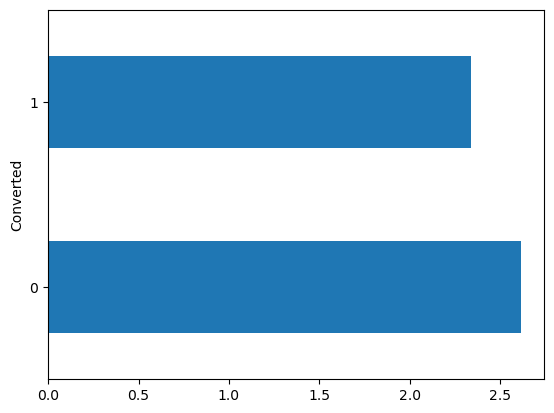

In [71]:
df_leads.groupby("Converted")['Page Views Per Visit'].mean().plot.barh()
plt.show()

##### Checking column Last Activity 
This column can be treated as one of the important columns as it deals with the Recency measure

In [72]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [73]:
df_leads['Last Activity'].value_counts() 


Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounced                    175
Form Submitted on Website         81
Unreachable                       71
Unsubscribed                      40
Had a Phone Conversation          23
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

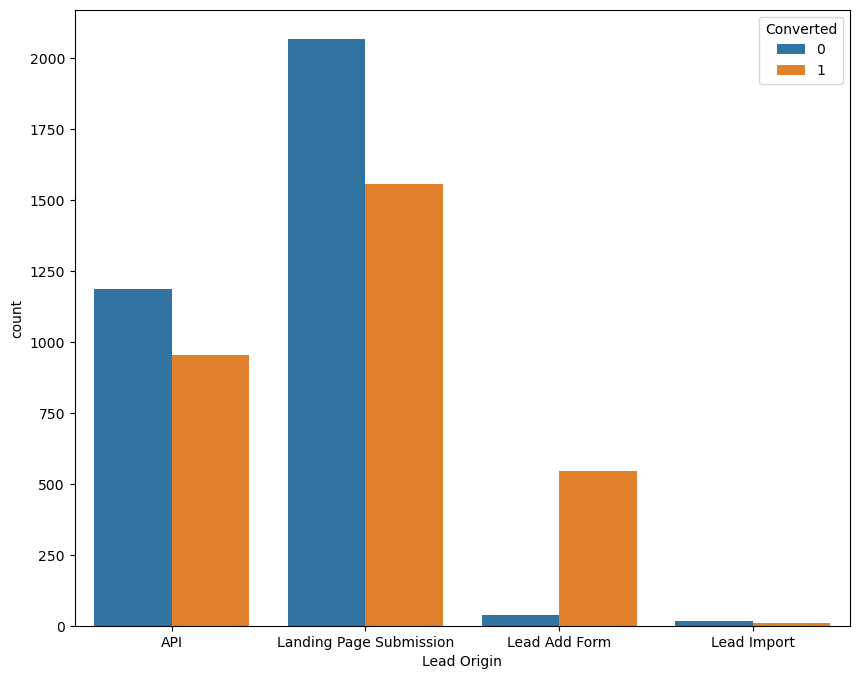

In [74]:
#Visualizing Lead Source
plt.figure(figsize=(10,8))
sns.countplot(data=df_leads, x="Lead Origin", hue="Converted")
plt.show()

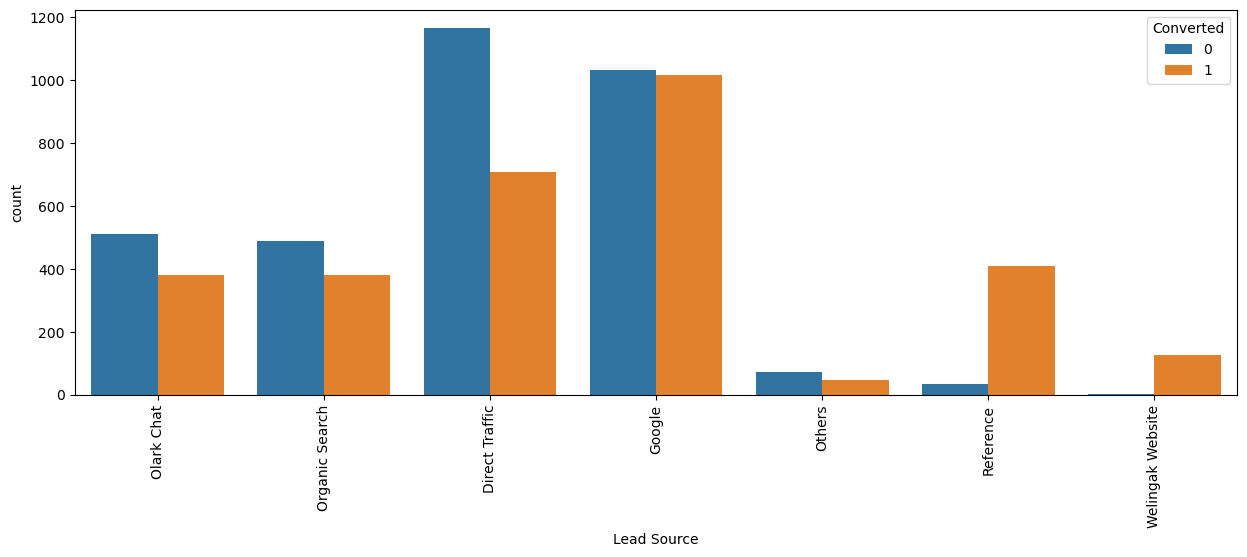

In [75]:
#Visualizing Lead Source
plt.figure(figsize=(15,5))
plot_leadsource=sns.countplot(data=df_leads, x="Lead Source", hue="Converted")
xticks = df_leads['Lead Source'].unique()
plot_leadsource.set_xticklabels(xticks,rotation = 90)
plt.show()

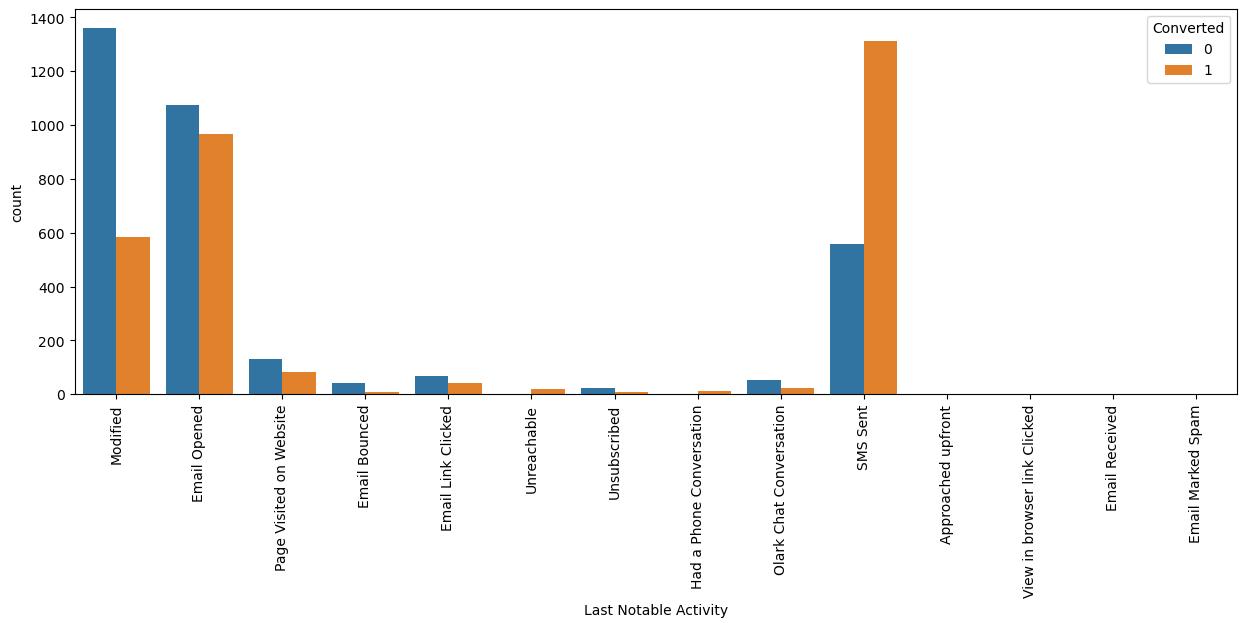

In [76]:
plt.figure(figsize=(15,5))
plot_leadsource=sns.countplot(data=df_leads, x="Last Notable Activity", hue="Converted")
xticks = df_leads['Last Notable Activity'].unique()
plot_leadsource.set_xticklabels(xticks,rotation = 90)
plt.show()

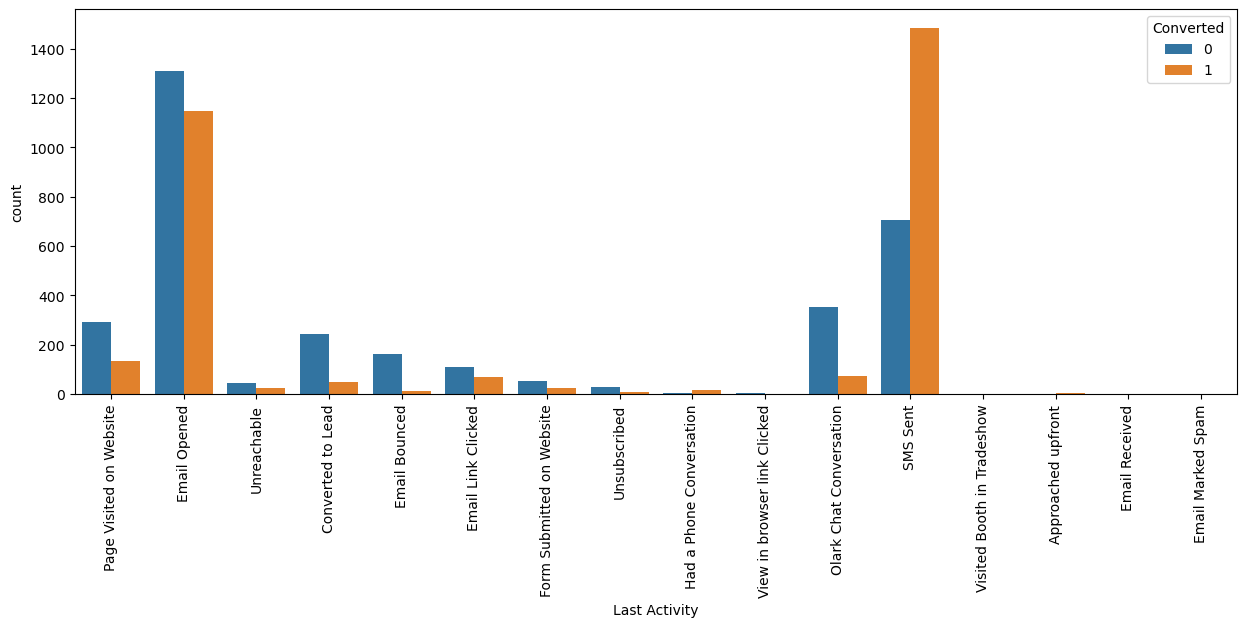

In [77]:
plt.figure(figsize=(15,5))
plot_lastactivity=sns.countplot(data=df_leads, x="Last Activity", hue="Converted")
xticks = df_leads['Last Activity'].unique()
plot_lastactivity.set_xticklabels(xticks,rotation = 90)
plt.show()

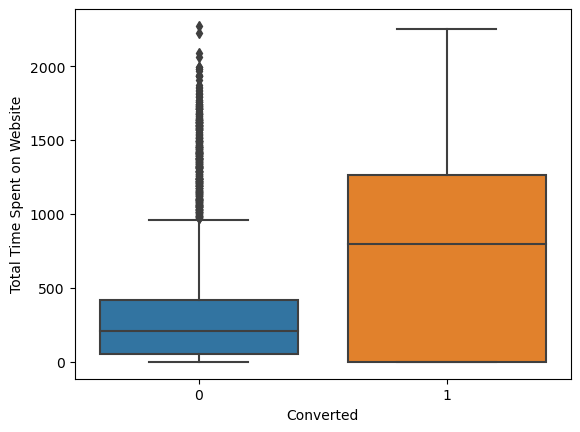

In [78]:
sns.boxplot(data=df_leads,x='Converted',y='Total Time Spent on Website')
plt.show()

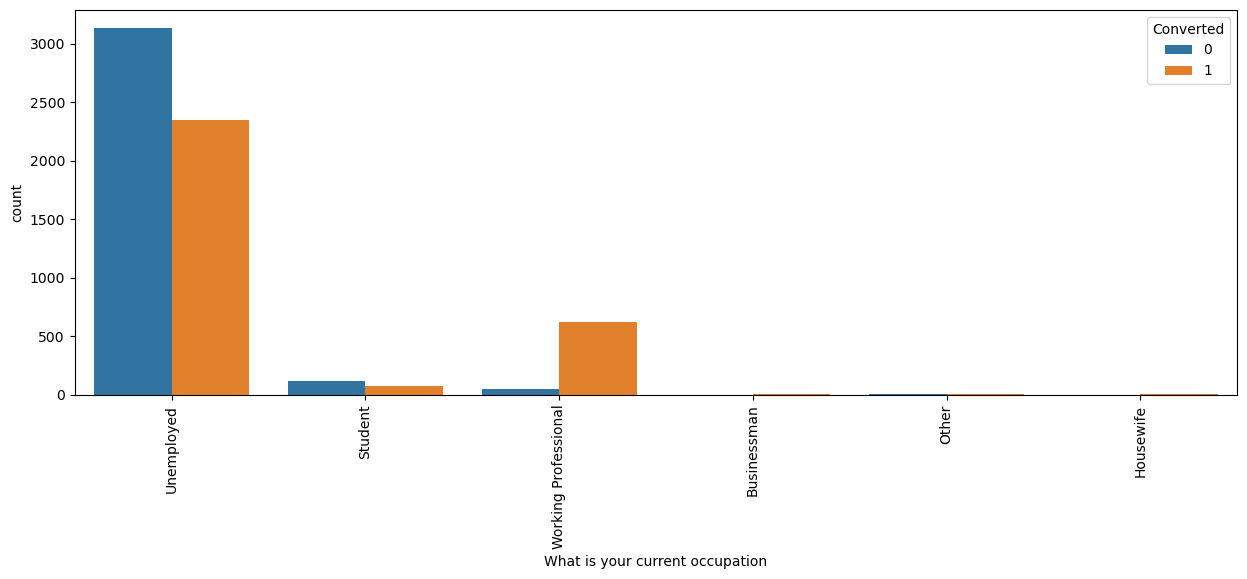

In [79]:
plt.figure(figsize=(15,5))
plot_leadsource=sns.countplot(data=df_leads, x="What is your current occupation", hue="Converted")
xticks = df_leads['What is your current occupation'].unique()
plot_leadsource.set_xticklabels(xticks,rotation = 90)
plt.show()

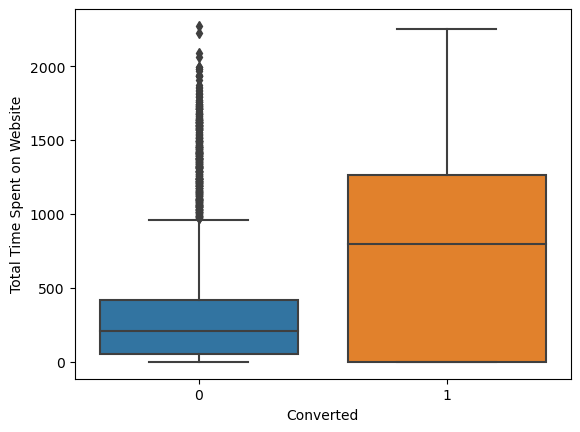

In [80]:
sns.boxplot(data=df_leads,x='Converted',y='Total Time Spent on Website')
plt.show()

#### Checking 'Do Not Email' column

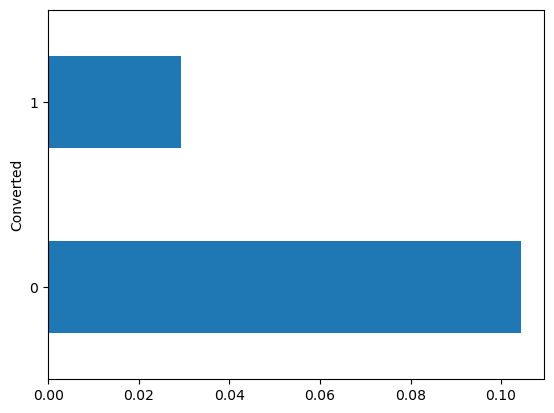

In [81]:
df_leads.groupby("Converted")['Do Not Email'].mean().plot.barh()
plt.show()

##### Checking the column Specialization

In [82]:
df_leads['Specialization'].value_counts()

Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

##### Here the highest value is Select which shows that candidate did not fill this column while filling the form. It cannot be ignored but can be changed to Unknown value 

In [83]:
df_leads['Specialization'].isnull().sum()

0

In [84]:
df_leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [85]:
df_leads['What is your current occupation'].isnull().sum()

0

In [86]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Checking the column a free copy of Mastering The Interview

In [87]:
df_leads['A free copy of Mastering The Interview'].value_counts()

0    4202
1    2171
Name: A free copy of Mastering The Interview, dtype: int64

<Axes: xlabel='Converted', ylabel='count'>

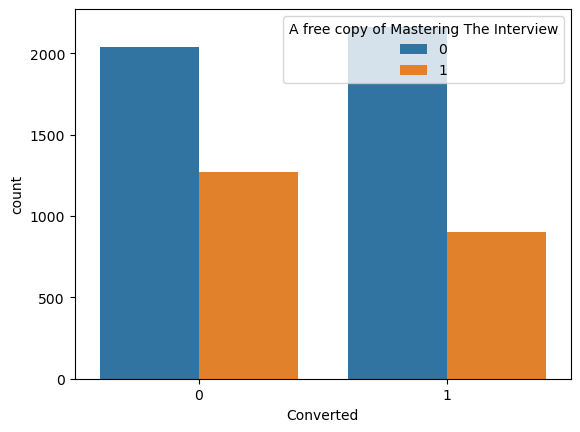

In [88]:
sns.countplot(x='Converted', hue='A free copy of Mastering The Interview', data=df_leads)

##### Above column can be considered 

##### Checking the column Last Notable Activity

In [89]:
df_leads['Last Notable Activity'].value_counts()

Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          213
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [90]:
df_leads['Last Notable Activity'].isnull().sum()

0

### Creating Dummy variables

##### We use one hot encoding process to create the dummy variables

In [91]:
df_leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                                int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview      int64
Last Notable Activity                      object
dtype: object

In [92]:

categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity']


### Applying one hot encoding method to create the dummy variables for the categorical columns

In [93]:
# Creating dummy variables for all the categorical variables
dummies = pd.get_dummies(df_leads[categorical_columns],dtype ='int',drop_first = True)


In [94]:
dummies

Do Not Email  A free copy of Mastering The Interview  \
0                0                                       0   
1                0                                       0   
2                0                                       1   
3                0                                       0   
4                0                                       0   
...            ...                                     ...   
9234             0                                       0   
9235             1                                       0   
9236             0                                       1   
9237             1                                       1   
9239             0                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       1                          0   
4                                       1                          0   
...                                   ...                        ...   
9234                                    1                          0   
9235                                    1                          0   
9236                                    1                          0   
9237                                    1                          0   
9239                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                           0                   0                       1   
1                           0                   0                       0   
2                           0                   0                       0   
3                           0                   0                       0   
4                           0                   1                       0   
...                       ...                 ...                     ...   
9234                        0                   0                       0   
9235                        0                   0                       0   
9236                        0                   0                       0   
9237                        0                   0                       0   
9239                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
0                              0                   0                      0   
1                              1                   0                      0   
2                              0                   0                      0   
3                              0                   0                      0   
4                              0                   0                      0   
...                          ...                 ...                    ...   
9234                           0                   0                      0   
9235                           0                   0                      0   
9236                           0                   0                      0   
9237                           0                   0                      0   
9239                           0                   0                      0   

      ...  Last Notable Activity_Email Opened  \
0     ...                                   0   
1     ...                                   1   
2     ...                                   1   
3     ...                                   0   
4     ...                                   0   
...   ...                                 ...   
9234  ...                                   0   
9235  ...                                   0   
9236  ...                                   0   
9237  ...                       

In [95]:
df_leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'Finance Management',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'IT Projects Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [96]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly
dummy_spl = pd.get_dummies(df_leads['Specialization'],dtype ='int', prefix = 'Specialization')


In [97]:
dummy_spl = dummy_spl.drop('Specialization_Select',axis = 1)
dummy_spl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Specialization_Banking, Investment And Insurance  6373 non-null   int32
 1   Specialization_Business Administration            6373 non-null   int32
 2   Specialization_E-Business                         6373 non-null   int32
 3   Specialization_E-COMMERCE                         6373 non-null   int32
 4   Specialization_Finance Management                 6373 non-null   int32
 5   Specialization_Healthcare Management              6373 non-null   int32
 6   Specialization_Hospitality Management             6373 non-null   int32
 7   Specialization_Human Resource Management          6373 non-null   int32
 8   Specialization_IT Projects Management             6373 non-null   int32
 9   Specialization_International Business    

In [98]:
# # Adding the results to the master dataframe
df_leads = pd.concat([df_leads,dummies],axis = 1)

In [99]:
df_leads = pd.concat([df_leads,dummy_spl],axis = 1)

In [100]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 92 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           6373 non-null   object 
 1   Lead Source                                           6373 non-null   object 
 2   Do Not Email                                          6373 non-null   int64  
 3   Converted                                             6373 non-null   int64  
 4   TotalVisits                                           6373 non-null   float64
 5   Total Time Spent on Website                           6373 non-null   int64  
 6   Page Views Per Visit                                  6373 non-null   float64
 7   Last Activity                                         6373 non-null   object 
 8   Specialization                                        6373

In [101]:
### Removing the repeatitive columns in the data frame
df_leads = df_leads.drop(categorical_columns,axis =1)

In [102]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   int32  
 5   Lead Origin_Lead Add Form                             6373 non-null   int32  
 6   Lead Origin_Lead Import                               6373 non-null   int32  
 7   Lead Source_Google                                    6373 non-null   int32  
 8   Lead Source_Olark Chat                                6373

# Building the logistic regression model

###  Splitting the dataframe into training & test set

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
y = df_leads.pop('Converted')

In [105]:
y.shape

(6373,)

In [106]:
X = df_leads
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6373 non-null   float64
 1   Total Time Spent on Website                           6373 non-null   int64  
 2   Page Views Per Visit                                  6373 non-null   float64
 3   Lead Origin_Landing Page Submission                   6373 non-null   int32  
 4   Lead Origin_Lead Add Form                             6373 non-null   int32  
 5   Lead Origin_Lead Import                               6373 non-null   int32  
 6   Lead Source_Google                                    6373 non-null   int32  
 7   Lead Source_Olark Chat                                6373 non-null   int32  
 8   Lead Source_Organic Search                            6373

In [107]:
X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Bu

In [108]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the numerical columns (using minmax scaler)

In [109]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
8003                        0                   0                       0   
218                         0                   0                       0   
4171                        0                   0                       0   
4037                        0                   0                       1   
3660                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  ...  \
8003                           0                   0  ...   
218                            0                   0  ...   
4171                           0                   0  ...   
4037                           0                   0  ...   
3660                           0                   0  ...   

      Specialization_IT Projects Management  \
8003                                      1   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171                   

### Plotting a heatmap to check the correlations among the different columns 

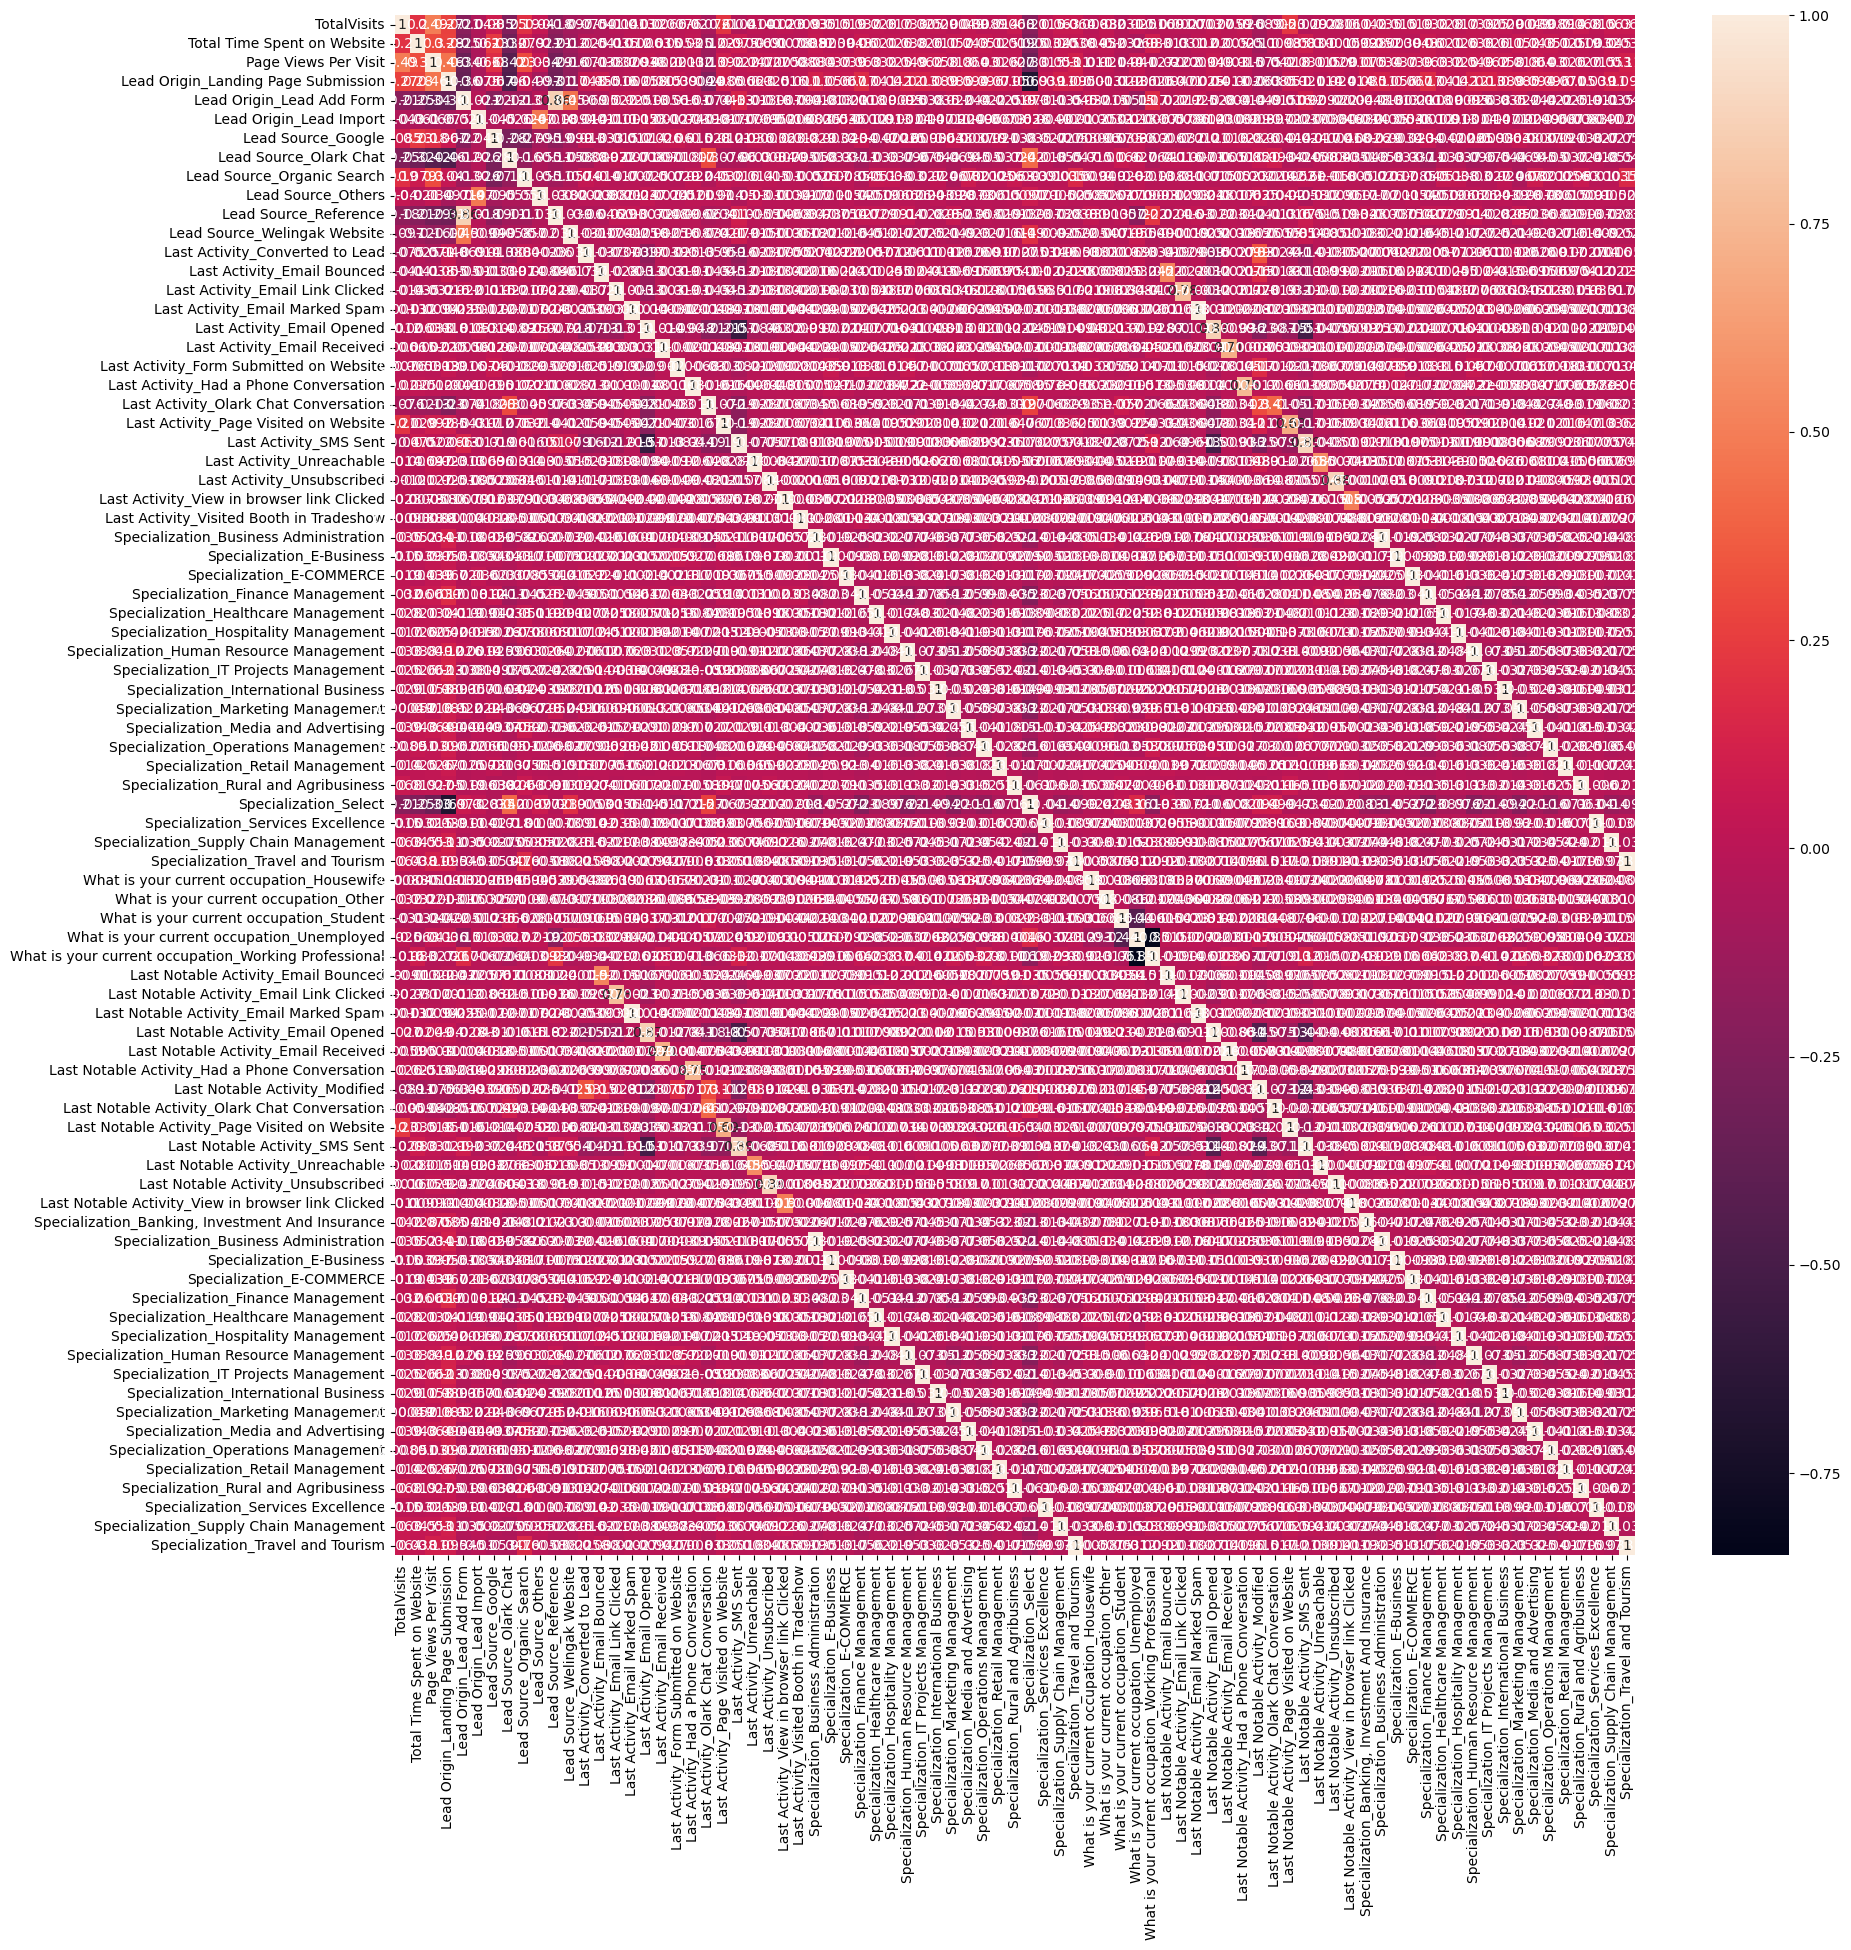

In [111]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df_leads.corr(),annot = True)
plt.show()

In [112]:
df_leads.corr()

TotalVisits  \
TotalVisits                                1.000000   
Total Time Spent on Website                0.202551   
Page Views Per Visit                       0.489039   
Lead Origin_Landing Page Submission        0.267954   
Lead Origin_Lead Add Form                 -0.208375   
...                                             ...   
Specialization_Retail Management           0.014223   
Specialization_Rural and Agribusiness      0.068015   
Specialization_Services Excellence         0.015114   
Specialization_Supply Chain Management     0.063383   
Specialization_Travel and Tourism          0.064384   

                                        Total Time Spent on Website  \
TotalVisits                                                0.202551   
Total Time Spent on Website                                1.000000   
Page Views Per Visit                                       0.303870   
Lead Origin_Landing Page Submission                        0.275606   
Lead Origin_Lead Add Form                                 -0.249493   
...                                                             ...   
Specialization_Retail Management                           0.024919   
Specialization_Rural and Agribusiness                      0.018767   
Specialization_Services Excellence                         0.003203   
Specialization_Supply Chain Management                     0.045386   
Specialization_Travel and Tourism                          0.037867   

                                        Page Views Per Visit  \
TotalVisits                                         0.489039   
Total Time Spent on Website                         0.303870   
Page Views Per Visit                                1.000000   
Lead Origin_Landing Page Submission                 0.458168   
Lead Origin_Lead Add Form                          -0.340185   
...                                                      ...   
Specialization_Retail Management                    0.026099   
Specialization_Rural and Agribusiness               0.027465   
Specialization_Services Excellence                  0.015230   
Specialization_Supply Chain Management              0.052972   
Specialization_Travel and Tourism                   0.111284   

                                        Lead Origin_Landing Page Submission  \
TotalVisits                                                        0.267954   
Total Time Spent on Website                                        0.275606   
Page Views Per Visit                                               0.458168   
Lead Origin_Landing Page Submission                                1.000000   
Lead Origin_Lead Add Form                                         -0.363764   
...                                                                     ...   
Specialization_Retail Management                                   0.070983   
Specialization_Rural and Agribusiness                              0.050077   
Specialization_Services Excellence                                 0.039433   
Specialization_Supply Chain Management                             0.111610   
Specialization_Travel and Tourism                                  0.094875   

                                        Lead Origin_Lead Add Form  \
TotalVisits                                             -0.208375   
Total Time Spent on Website                             -0.249493   
Page Views Per Visit                                    -0.340185   
Lead Origin_Landing Page Submission                     -0.363764   
Lead Origin_Lead Add Form                                1.000000   
...                                                           ...   
Specialization_Retail Management                        -0.025339   
Specialization_Rural and Agribusiness                   -0.018872   
Specialization_Services Excellence                      -0.011155   
Specialization_Supply Chain Management                  -0.035065   
Specialization_Travel and Tourism                

###  Selecting specifc features using recursive feature elimination (RFE)

In [113]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg = LogisticRegression()

In [114]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([ True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 18),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 53),
 ('Last Activity_Email Marked Spam', False, 66),
 ('Last Activity_Email Opened', False, 13),
 ('Last Activity_Email Received', False, 52),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS S

In [117]:
col = X_train.columns[rfe.support_]

In [118]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects

### Final columns after the recursive feature elimination

In [119]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [120]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.7986998430845103
Testing Accuracy
0.5287656903765691
[[136 860]
 [ 41 875]]
              precision    recall  f1-score   support

           0       0.77      0.14      0.23       996
           1       0.50      0.96      0.66       916

    accuracy                           0.53      1912
   macro avg       0.64      0.55      0.45      1912
weighted avg       0.64      0.53      0.44      1912



In [121]:
logreg.predict_proba(X_test)

array([[0.00304515, 0.99695485],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [122]:
# Import RFE and select 15 variables
# running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 18),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 21),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 53),
 ('Last Activity_Email Marked Spam', False, 66),
 ('Last Activity_Email Opened', False, 13),
 ('Last Activity_Email Received', False, 52),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Page Visited on Website', False, 26),
 ('Last Activity_SMS S

In [124]:
col = X_train.columns[rfe.support_]

In [125]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [126]:
# Import statsmodels
import statsmodels.api as sm

In [127]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2089.3
Date:                Mon, 16 Oct 2023   Deviance:                       4178.7
Time:                        12:33:43   Pearson chi2:                 4.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3613
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8480      0.605     -1.401      0.161      -2.034       0.338
TotalVisits                                             10.6372      2.840      3.746      0.000       5.071      16.203
Total Time Spent on Website                              4.4661      0.185     24.198      0.000       4.104       4.828
Lead Origin_Landing Page Submission                     -0.3231      0.097     -3.316      0.001      -0.514      -0.132
Lead Origin_Lead Add Form                                3.9546      0.266     14.859      0.000       3.433       4.476
Lead Source_Olark Chat                                   1.2460      0.138      9.034      0.000       0.976       1.516
Lead Source_Welingak Website                             2.1088      1.036      2.035      0.042       0.078       4.140
Last Activity_Email Bounced                             -1.6618      0.366     -4.542      0.000      -2.379      -0.945
Last Activity_Had a Phone Conversation                   0.9848      0.982      1.003      0.316      -0.939       2.909
Last Activity_SMS Sent                                   1.1267      0.082     13.731      0.000       0.966       1.288
What is your current occupation_Housewife               22.7903   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
What is your current occupation_Student                 -1.0833      0.632     -1.713      0.087      -2.323       0.156
What is your current occupation_Unemployed              -1.2976      0.597     -2.174      0.030      -2.467      -0.128
What is your current occupation_Working Professional     1.3399      0.626      2.141      0.032       0.113       2.567
Last Notable Activity_Had a Phone Conversation          23.3176   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.8076      0.807      3.479      0.001       1.226       4.389
========================================================================================================================
"""

In [128]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking the VIF of all the columns

In [129]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  6.39
2                 Lead Origin_Landing Page Submission  3.78
7              Last Activity_Had a Phone Conversation  2.44
13     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.37
3                           Lead Origin_Lead Add Form  2.03
4                              Lead Source_Olark Chat  1.90
12  What is your current occupation_Working Profes...  1.90
0                                         TotalVisits  1.63
8                              Last Activity_SMS Sent  1.62
5                        Lead Source_Welingak Website  1.33
10            What is your current occupation_Student  1.20
6                         Last Activity_Email Bounced  1.05
9           What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01

##### VIF is high for What is your current occupation_Unemployed. So let us drop it.

In [130]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [131]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2091.9
Date:                Mon, 16 Oct 2023   Deviance:                       4183.7
Time:                        12:33:44   Pearson chi2:                 4.90e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3605
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1426      0.113    -18.906      0.000      -2.365      -1.920
TotalVisits                                             11.0291      2.849      3.871      0.000       5.446      16.613
Total Time Spent on Website                              4.4686      0.184     24.225      0.000       4.107       4.830
Lead Origin_Landing Page Submission                     -0.3243      0.097     -3.329      0.001      -0.515      -0.133
Lead Origin_Lead Add Form                                3.9602      0.266     14.882      0.000       3.439       4.482
Lead Source_Olark Chat                                   1.2481      0.138      9.048      0.000       0.978       1.518
Lead Source_Welingak Website                             2.1033      1.036      2.030      0.042       0.072       4.134
Last Activity_Email Bounced                             -1.6686      0.366     -4.562      0.000      -2.386      -0.952
Last Activity_Had a Phone Conversation                   0.9737      0.982      0.992      0.321      -0.951       2.898
Last Activity_SMS Sent                                   1.1181      0.082     13.646      0.000       0.958       1.279
What is your current occupation_Housewife               24.0804   2.43e+04      0.001      0.999   -4.75e+04    4.76e+04
What is your current occupation_Student                  0.2075      0.217      0.956      0.339      -0.218       0.633
What is your current occupation_Working Professional     2.6311      0.197     13.343      0.000       2.245       3.018
Last Notable Activity_Had a Phone Conversation          23.3139   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                        2.8085      0.806      3.487      0.000       1.230       4.387
========================================================================================================================
"""

In [132]:
#Dropping 'Last Notable Activity_Had a Phone Conversation'
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [133]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.9
Date:                Mon, 16 Oct 2023   Deviance:                       4189.8
Time:                        12:33:44   Pearson chi2:                 4.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1455      0.113    -18.930      0.000      -2.368      -1.923
TotalVisits                                             11.1422      2.849      3.912      0.000       5.559      16.725
Total Time Spent on Website                              4.4608      0.184     24.202      0.000       4.100       4.822
Lead Origin_Landing Page Submission                     -0.3195      0.097     -3.282      0.001      -0.510      -0.129
Lead Origin_Lead Add Form                                3.9635      0.266     14.894      0.000       3.442       4.485
Lead Source_Olark Chat                                   1.2513      0.138      9.071      0.000       0.981       1.522
Lead Source_Welingak Website                             2.1032      1.036      2.029      0.042       0.072       4.134
Last Activity_Email Bounced                             -1.6679      0.366     -4.561      0.000      -2.385      -0.951
Last Activity_Had a Phone Conversation                   2.7753      0.803      3.454      0.001       1.201       4.350
Last Activity_SMS Sent                                   1.1177      0.082     13.646      0.000       0.957       1.278
What is your current occupation_Housewife               23.0790   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
What is your current occupation_Student                  0.2073      0.217      0.955      0.339      -0.218       0.633
What is your current occupation_Working Professional     2.6281      0.197     13.326      0.000       2.242       3.015
Last Notable Activity_Unreachable                        2.8076      0.805      3.486      0.000       1.229       4.386
========================================================================================================================
"""

###### Column What is your current occupation_Housewife is having very high p value. This is also need to be removed

In [134]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [135]:
#refiting the model with new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.8
Date:                Mon, 16 Oct 2023   Deviance:                       4203.7
Time:                        12:33:44   Pearson chi2:                 4.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3577
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1362      0.113    -18.889      0.000      -2.358      -1.915
TotalVisits                                             10.9267      2.838      3.851      0.000       5.365      16.489
Total Time Spent on Website                              4.4592      0.184     24.231      0.000       4.099       4.820
Lead Origin_Landing Page Submission                     -0.3115      0.097     -3.206      0.001      -0.502      -0.121
Lead Origin_Lead Add Form                                3.9739      0.266     14.948      0.000       3.453       4.495
Lead Source_Olark Chat                                   1.2461      0.138      9.045      0.000       0.976       1.516
Lead Source_Welingak Website                             2.0872      1.036      2.014      0.044       0.056       4.118
Last Activity_Email Bounced                             -1.6775      0.366     -4.589      0.000      -2.394      -0.961
Last Activity_Had a Phone Conversation                   2.7667      0.803      3.444      0.001       1.192       4.341
Last Activity_SMS Sent                                   1.1078      0.082     13.545      0.000       0.948       1.268
What is your current occupation_Student                  0.1997      0.217      0.921      0.357      -0.225       0.625
What is your current occupation_Working Professional     2.6204      0.197     13.293      0.000       2.234       3.007
Last Notable Activity_Unreachable                        2.7973      0.805      3.474      0.001       1.219       4.376
========================================================================================================================
"""

###### Column What is your current occupation_Student  has high p value. This column needs to be removed

In [136]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

In [137]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2102.3
Date:                Mon, 16 Oct 2023   Deviance:                       4204.5
Time:                        12:33:44   Pearson chi2:                 4.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3575
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1297      0.113    -18.878      0.000      -2.351      -1.909
TotalVisits                                             10.8757      2.835      3.836      0.000       5.319      16.432
Total Time Spent on Website                              4.4600      0.184     24.236      0.000       4.099       4.821
Lead Origin_Landing Page Submission                     -0.3095      0.097     -3.187      0.001      -0.500      -0.119
Lead Origin_Lead Add Form                                3.9776      0.266     14.963      0.000       3.457       4.499
Lead Source_Olark Chat                                   1.2521      0.138      9.098      0.000       0.982       1.522
Lead Source_Welingak Website                             2.0800      1.036      2.007      0.045       0.049       4.111
Last Activity_Email Bounced                             -1.6814      0.366     -4.599      0.000      -2.398      -0.965
Last Activity_Had a Phone Conversation                   2.7601      0.803      3.437      0.001       1.186       4.334
Last Activity_SMS Sent                                   1.1030      0.082     13.522      0.000       0.943       1.263
What is your current occupation_Working Professional     2.6139      0.197     13.270      0.000       2.228       3.000
Last Notable Activity_Unreachable                        2.7899      0.805      3.465      0.001       1.212       4.368
========================================================================================================================
"""

### Re-checking the VIF values

In [138]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.15
1                         Total Time Spent on Website  1.93
8                              Last Activity_SMS Sent  1.55
0                                         TotalVisits  1.52
3                           Lead Origin_Lead Add Form  1.51
5                        Lead Source_Welingak Website  1.32
9   What is your current occupation_Working Profes...  1.20
4                              Lead Source_Olark Chat  1.06
6                         Last Activity_Email Bounced  1.04
7              Last Activity_Had a Phone Conversation  1.01
10                  Last Notable Activity_Unreachable  1.01

# Evaluating the Model

In [139]:
X_train.shape

(4461, 11)

In [140]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.262830
218     0.130249
4171    0.116493
4037    0.293684
3660    0.950307
207     0.229654
2044    0.211695
6411    0.961920
6498    0.049535
2085    0.980695
dtype: float64

In [141]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26282981, 0.13024888, 0.11649286, 0.29368435, 0.95030674,
       0.2296536 , 0.21169513, 0.96192015, 0.04953529, 0.98069518])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [142]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.262830
1          0         0.130249
2          1         0.116493
3          1         0.293684
4          1         0.950307

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [143]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.262830          0
1          0         0.130249          0
2          1         0.116493          0
3          1         0.293684          0
4          1         0.950307          1

In [144]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

## Creating a confusion matrix

In [145]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1923  389]
 [ 570 1579]]


In [146]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7850257789733244


In [147]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Calculate the sensitivity
TP/(TP+FN)

0.7347603536528617

In [149]:
# Calculate the specificity
TN/(TN+FP)

0.8317474048442907

### Cutoff value 

### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [150]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [151]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

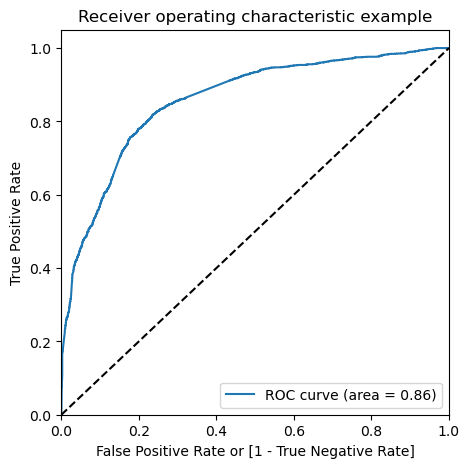

In [152]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [153]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.262830          0    1    1    1    0    0    0    0   
1          0         0.130249          0    1    1    0    0    0    0    0   
2          1         0.116493          0    1    1    0    0    0    0    0   
3          1         0.293684          0    1    1    1    0    0    0    0   
4          1         0.950307          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [154]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.520287  0.991624  0.082180
0.2   0.2  0.688859  0.947417  0.448529
0.3   0.3  0.769334  0.861331  0.683824
0.4   0.4  0.789061  0.800372  0.778547
0.5   0.5  0.785026  0.734760  0.831747
0.6   0.6  0.753643  0.618893  0.878893
0.7   0.7  0.731899  0.536994  0.913062
0.8   0.8  0.708361  0.443927  0.954152
0.9   0.9  0.642681  0.276873  0.982699


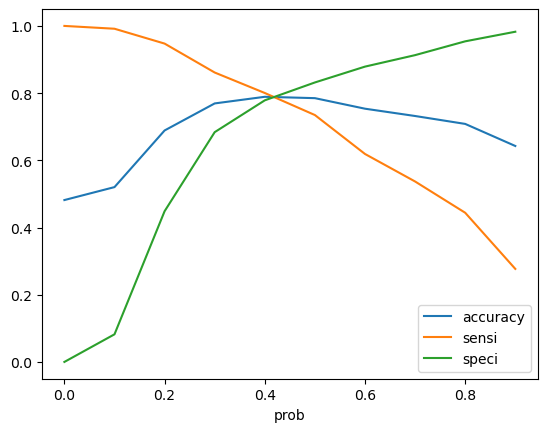

In [155]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [156]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.262830          0    1    1    1    0    0    0    0   
1          0         0.130249          0    1    1    0    0    0    0    0   
2          1         0.116493          0    1    1    0    0    0    0    0   
3          1         0.293684          0    1    1    1    0    0    0    0   
4          1         0.950307          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [157]:
# Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7886124187401928

In [158]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1827,  485],
       [ 458, 1691]], dtype=int64)

In [159]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
# Calculate Sensitivity
TP/(TP+FN)

0.78687761749651

In [161]:
# Calculate Specificity

TN/(TN+FP)

0.7902249134948097

# Testing the Model On Test Set

In [162]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [163]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  \
4771     0.000000                     0.000000   
6122     0.027888                     0.029049   
9202     0.015936                     0.416813   
6570     0.011952                     0.378961   
2668     0.031873                     0.395246   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4771                       0                             0   
6122                       0                             0   
9202                       0                             0   
6570                       0                             0   
2668                       0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
4771                            0                                       0   
6122                            0                                       0   
9202                            0                                       0   
6570                            0                                       0   
2668                            0                                       0   

      Last Activity_SMS Sent  What is your current occupation_Housewife  \
4771                       1                                          0   
6122                       0                                          0   
9202                       1                                          0   
6570                       1                                          0   
2668                       1                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [164]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [165]:
# Check X_test_sm
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   
...                                   ...                        ...   
5828                                    1                          0   
6583                                    1                          0   
5531                                    1                          0   
3056                                    0                          0   
4088                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4771                       0                             0   
6122                       0                             0   
9202                       0                             0   
6570                       0                             0   
2668                       0                             0   
...                      ...                           ...   
5828                       0                             0   
6583                       0                             0   
5531                       0                             0   
3056                       0                             0   
4088                       0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
4771                            0                                       0   
6122                            0                                       0   
9202                            0                                       0   
6570                            0                                       0   
2668                            0                                       0   
...                           ...                                     ...   
5828                            0                                       0   
6583                            0                                       0   
5531                            0                                       0   
3056                            0                                       0   
4088                            0                                       0   

      Last Activity_SMS Sent  What is your current occupation_Housewife  \
4771                       1                                          0   
6122                       0                                          0   
9202                       1                                          0   
6570                       1                                          0   
2668                       1                                          0   
...                      ...                                        ...   
5828                       1                                          0   
6583                       1                                          0   
5531                       0                                          0   
3056                       1        

In [166]:
# Drop the required columns from X_test as well
X_test.drop(['What is your current occupation_Unemployed',
             'Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife',
             'What is your current occupation_Student'], axis = 1, inplace = True)

In [167]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [168]:
y_test_pred[:10]

4771    0.996184
6122    0.118543
9202    0.667331
6570    0.618690
2668    0.684228
4233    0.944766
3368    0.750585
9091    0.441427
5972    0.247483
3631    0.756944
dtype: float64

In [169]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [170]:
# Let's see the head
y_pred_1.head()

0
4771  0.996184
6122  0.118543
9202  0.667331
6570  0.618690
2668  0.684228

In [171]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [172]:
# Remove index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
# Check 'y_pred_final'
y_pred_final.head()

Converted         0
0          1  0.996184
1          0  0.118543
2          0  0.667331
3          1  0.618690
4          1  0.684228

In [175]:
# Rename the column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [176]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996184
1          0         0.118543
2          0         0.667331
3          1         0.618690
4          1         0.684228

In [177]:
# Make predictions on the test set using 0.42 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [178]:
# Check y_pred_final
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996184                1
1          0         0.118543                0
2          0         0.667331                1
3          1         0.618690                1
4          1         0.684228                1

In [179]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7892259414225942

In [180]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[792, 204],
       [199, 717]], dtype=int64)

In [181]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [182]:
# Calculate specificity
TN / float(TN+FP)

0.7951807228915663

#### We will proceed to Precision and Recall model evaluation

In [183]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1923,  389],
       [ 570, 1579]], dtype=int64)

##### Precision Calculation
TP / TP + FP

In [184]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8023373983739838

##### Recall
TP / TP + FN

In [185]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7347603536528617

### Precision and recall tradeoff

The choice between accuracy, precision, and recall in a lead scoring model depends on the specific business goals and priorities of the organization. Here's a brief explanation of each metric and when you might prioritize them in the context of a logistic regression lead scoring model:

    Accuracy: Accuracy represents the ratio of correctly predicted instances to the total instances. It is a good general metric for overall model performance when the class distribution (converted vs. not converted leads) is roughly equal. However, accuracy can be misleading if the class distribution is imbalanced.

    Precision: Precision measures the ratio of correctly predicted positive observations to the total predicted positives. In the context of lead scoring, precision is relevant when the cost of false positives (misclassifying a non-converting lead as a converting lead) is high. High precision means the model is good at not misclassifying non-converting leads as potential conversions.

    Recall (Sensitivity): Recall measures the ratio of correctly predicted positive observations to all actual positives. Recall is important when the cost of false negatives (missing out on potential converting leads) is high. High recall indicates that the model can capture a significant portion of actual converting leads.

In the context of lead scoring, precision is often given higher weightage when:

    Limited Sales Resources: If the sales team's resources are limited and they need to focus on the most promising leads, precision is crucial. You want to make sure that the leads identified as potential conversions are highly likely to convert, minimizing wasted efforts on unlikely prospects.

However, if the business goal is to capture as many potential conversions as possible, even at the risk of including some false positives, then recall might be prioritized. It ensures that a larger proportion of actual converting leads is identified, though at the cost of potentially including some non-converting leads in the mix.

It's essential to consider the business context, the cost associated with false positives and false negatives, and the resources available for lead follow-up while deciding the appropriate metric to emphasize in the lead scoring model.

In [186]:
from sklearn.metrics import precision_recall_curve

In [187]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [188]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

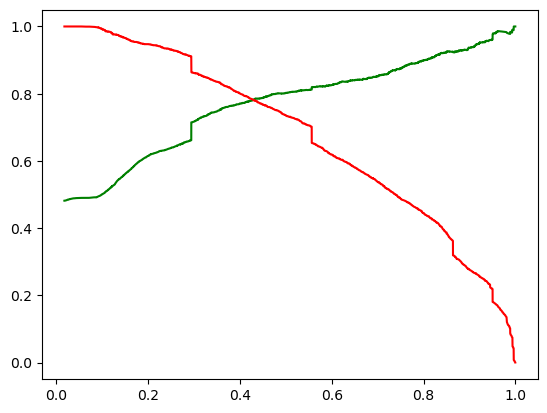

In [189]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [190]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.262830          0    1    1    1    0    0    0    0   
1          0         0.130249          0    1    1    0    0    0    0    0   
2          1         0.116493          0    1    1    0    0    0    0    0   
3          1         0.293684          0    1    1    1    0    0    0    0   
4          1         0.950307          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

### Accuracy Calculation

In [191]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.788836583725622

In [192]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1857,  455],
       [ 487, 1662]], dtype=int64)

In [193]:

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
# Calculate Precision

TP/(TP+FP)

0.7850732168162494

In [195]:
# Calculate Recall

TP/(TP+FN)

0.7733829688227082

### Predictions on test set

In [196]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [197]:
y_test_pred[:10]

4771    0.996184
6122    0.118543
9202    0.667331
6570    0.618690
2668    0.684228
4233    0.944766
3368    0.750585
9091    0.441427
5972    0.247483
3631    0.756944
dtype: float64

In [198]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [199]:
y_pred_1.head()

0
4771  0.996184
6122  0.118543
9202  0.667331
6570  0.618690
2668  0.684228

In [200]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [201]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [202]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [203]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996184
1          0  0.118543
2          0  0.667331
3          1  0.618690
4          1  0.684228

In [204]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [205]:
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996184
1          0         0.118543
2          0         0.667331
3          1         0.618690
4          1         0.684228

In [206]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [207]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996184                1
1          0         0.118543                0
2          0         0.667331                1
3          1         0.618690                1
4          1         0.684228                1

### Accuracy Calculation

In [208]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7902719665271967

In [209]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[805, 191],
       [210, 706]], dtype=int64)

In [210]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision and Recall Calculations

In [211]:
# Calculate Precision
TP/(TP+FP)

0.7870680044593088

In [212]:
# Calculate Recall

TP/(TP+FN)

0.7707423580786026